## Lattice Wannier Functions
Similar to the concepts of electron Wannier functions, we can build lattice wannier functions (LWF). In minimulti, the scdm-k method is implemented to build LWF. Here is an example of how to use it.
The phonon band below is that of BaTiO3 (LO-TO splitting is not considered, they can be added after the LWF hamiltonian is build.)

A usual application of LWF is to build effective Hamiltonian which consists a branch of phonons, which some mode (e.g. in BaTiO3, the $\Gamma$ ferroelectric mode) are of interest. We can input these mode to the code (which are called anchor points) and then the code can find an effective Hamiltonian which reproduce part of the phonon dispertion curve. 

In [2]:
from ase.io import read
from minimulti.lattice.lattice import Lattice
import matplotlib.pyplot as plt

def read_phonon_model(ifc_file = 'BaTiO3.ifc', struct_file='BaTiO3.vasp'):
    atoms = read(struct_file)   # reference atomic structure
    calc = Lattice(ref_atoms=atoms)   # initialize Lattice model
    calc.read_ifc_file(fname=ifc_file) # IFC from ifcfile
    return calc

def plot_lattice_wannier(color='green', ind=0, emax=0, ifc_file = 'BaTiO3.ifc', struct_file='BaTiO3.vasp'):
    calc=read_phonon_model(ifc_file = ifc_file, struct_file=struct_file)
    ax = calc.plot_phonon_band(color=color, ax=None)
    ax = calc.scdmk(nwann=3, ftype='Fermi', mu=emax, sigma=100, ax=ax,
                    anchor_only=False,anchors={(.0,.0,.0):(0,1,2)}, 
                    scols=[3*ind, 3*ind+1, 3*ind+2])
    plt.show()

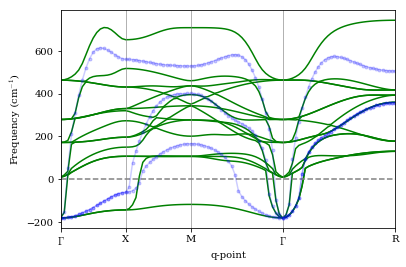

In [2]:
%matplotlib inline
plot_lattice_wannier(ind=0, emax=800, ifc_file='./data/BaTiO3.ifc', struct_file='./data/BaTiO3.vasp')

### Use of energy window
It can be noted that in the example above, the dispertion curve does not strictly follow some band. It is because the algorithm consider the global picture and mix some of the modes. If we are only interested in some energy range (typically some low energies), an energy window can be used to control the mixing of these modes. For example, if we limit the energy to below 300, the dispertion of the LWF becomes the one below. You can tune the emax paramter to see how it changes.

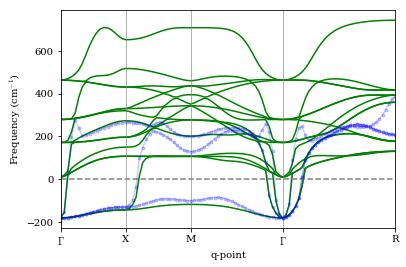

In [4]:
%matplotlib inline
plot_lattice_wannier(ind=0, emax=300, ifc_file='./data/BaTiO3.ifc', struct_file='./data/BaTiO3.vasp')